In [37]:
from packages import *

In [58]:
data_path = '../DATA/A-4/'
file_path = lambda tau, n: data_path + 'A-4_{}s_{}_100mV.csv'.format(tau, n)
COLUMNS = ['frequency [Hz]',	'output p-p [mV]',	'input p-p [mV]']
def get_data(tau, n):
  data = pd.read_csv(file_path(tau, n))
  freq, out, inp = [data[COLUMNS[i]] for i in range(3)]
  out = np.array(out); inp = np.array(inp)
  gain = pd.Series(out / inp)
  return freq, gain
freq, gain = get_data(0.03, 6)
baseline = gain[:12].mean()

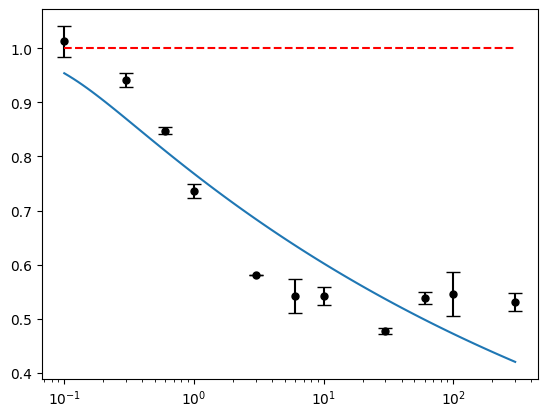

In [85]:
freq, gain = get_data(0.3, 6)
gain = gain / baseline
func = lambda w, a, b: 1 / (1 + ((w)/b) ** 2) ** a
popt, pcov = scipy.optimize.curve_fit(func, freq, gain)
xmin, xmax = 1e-1, 3e2

x = freq.unique()
y = np.zeros((len(x), 2))
for idx, val in enumerate(x):
  mask = val == freq
  y[idx, 0] = gain[mask].mean()
  y[idx, 1] = gain[mask].std()

plt.errorbar(x, y[:, 0], yerr=y[:, 1], fmt='o', ms=5, 
            color='black', label=f'shift 45°',
            capsize=5, capthick=1)

x_range = np.logspace(np.log10(xmin), np.log10(xmax), 100)
plt.xscale('log')
plt.plot([xmin, xmax], [1]*2, 'r--')
plt.plot(x_range, func(x_range, *popt))
plt.show()

In [104]:
def plot_data(tau, n, cutoff=1, color='black'):
  freq, gain = get_data(tau, n)
  freq, gain = freq[:-cutoff*3], gain[:-cutoff*3]
  gain = gain / baseline
  func = lambda w, a, b: 1 / (1 + ((w)/b) ** 2) ** a
  popt, pcov = scipy.optimize.curve_fit(func, freq, gain)
  print(popt)
  xmin, xmax = 1e-1, 3e2

  x = freq.unique()
  y = np.zeros((len(x), 2))
  for idx, val in enumerate(x):
    mask = val == freq
    y[idx, 0] = gain[mask].mean()
    y[idx, 1] = gain[mask].std()

  plt.errorbar(x, np.log10(y[:, 0])*10, yerr=y[:, 1]/y[:, 0] * np.log(10), fmt='o', ms=5, 
              color=f'{color}', label=f'$\\tau$={tau}',
              capsize=5, capthick=1)

  x_range = np.logspace(np.log10(xmin), np.log10(xmax), 100)
  plt.xscale('log')
  plt.plot([xmin, xmax], [0]*2, 'r--')
  plt.plot(x_range, np.log10(func(x_range, *popt))*10, color=color)

[0.13309497 2.56397564]
[0.13397752 0.94926834]
[0.13046001 0.36089436]


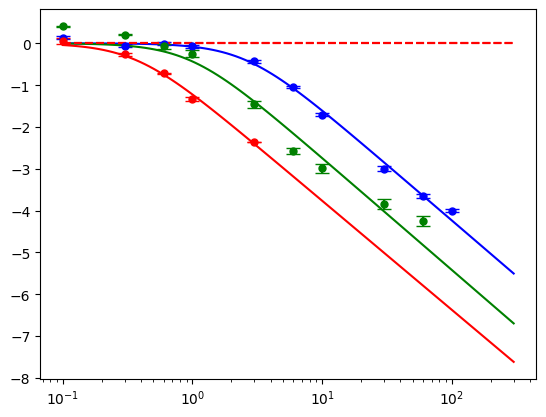

In [110]:
plot_data(0.03, 6, cutoff=1, color='blue')
plot_data(0.1, 6, cutoff=2, color='green')
plot_data(0.3, 6, cutoff=6, color='red')

[0.09688307 1.0240667 ]
[ 0.08848192 -0.42486472]
[0.11669166 1.36622545]


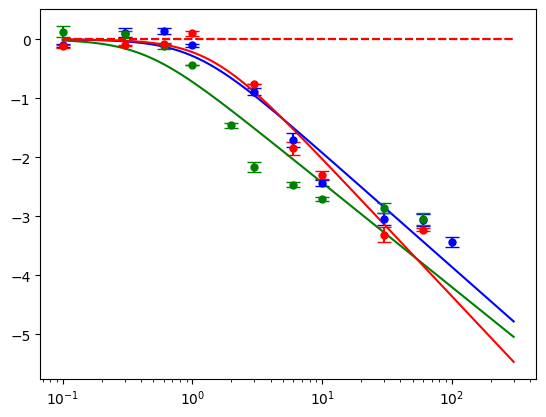

In [113]:
plot_data(0.03, 12, cutoff=1, color='blue')
plot_data(0.1, 12, cutoff=2, color='green')
plot_data(0.3, 12, cutoff=2, color='red')

In [ ]:
freq, gain = get_data(0.03, 6)
freq, gain = freq[:-3], gain[:-3]
gain = gain / baseline
func = lambda w, a, b: 1 / (1 + ((w)/b) ** 2) ** a
popt, pcov = scipy.optimize.curve_fit(func, freq, gain)
print(popt)
xmin, xmax = 1e-1, 3e2

x = freq.unique()
y = np.zeros((len(x), 2))
for idx, val in enumerate(x):
  mask = val == freq
  y[idx, 0] = gain[mask].mean()
  y[idx, 1] = gain[mask].std()

plt.errorbar(x, np.log10(y[:, 0]), yerr=y[:, 1]/y[:, 0] * np.log(10), fmt='o', ms=5, 
            color='black', label=f'shift 45°',
            capsize=5, capthick=1)

x_range = np.logspace(np.log10(xmin), np.log10(xmax), 100)
plt.xscale('log')
plt.plot([xmin, xmax], [0]*2, 'r--')
plt.plot(x_range, np.log10(func(x_range, *popt)))

freq, gain = get_data(0.3, 6)
freq, gain = freq[:-15], gain[:-15]
gain = gain / baseline
func = lambda w, a, b: 1 / (1 + ((w)/b) ** 2) ** a
popt, pcov = scipy.optimize.curve_fit(func, freq, gain)
print(popt)
xmin, xmax = 1e-1, 3e2

x = freq.unique()
y = np.zeros((len(x), 2))
for idx, val in enumerate(x):
  mask = val == freq
  y[idx, 0] = gain[mask].mean()
  y[idx, 1] = gain[mask].std()

plt.errorbar(x, np.log10(y[:, 0]), yerr=y[:, 1]/y[:, 0] * np.log(10), fmt='o', ms=5, 
            color='red', label=f'shift 45°',
            capsize=5, capthick=1)

x_range = np.logspace(np.log10(xmin), np.log10(xmax), 100)
plt.xscale('log')
plt.plot([xmin, xmax], [0]*2, 'r--')
plt.plot(x_range, np.log10(func(x_range, *popt)))

freq, gain = get_data(0.1, 6)
freq, gain = freq[:-3], gain[:-3]
gain = gain / baseline
func = lambda w, a, b: 1 / (1 + ((w)/b) ** 2) ** a
popt, pcov = scipy.optimize.curve_fit(func, freq, gain)
print(popt)
xmin, xmax = 1e-1, 3e2

x = freq.unique()
y = np.zeros((len(x), 2))
for idx, val in enumerate(x):
  mask = val == freq
  y[idx, 0] = gain[mask].mean()
  y[idx, 1] = gain[mask].std()

plt.errorbar(x, np.log10(y[:, 0]), yerr=y[:, 1]/y[:, 0] * np.log(10), fmt='o', ms=5, 
            color='green', label=f'shift 45°',
            capsize=5, capthick=1)

x_range = np.logspace(np.log10(xmin), np.log10(xmax), 100)
plt.xscale('log')
plt.plot([xmin, xmax], [0]*2, 'r--')
plt.plot(x_range, np.log10(func(x_range, *popt)))


In [91]:
popt

array([0.10959187, 0.29790438])